### Modeling
- modeling off of multiple prior years
- removed nighttime hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

import pickle

In [2]:
with open('pickles/data_00021_train1.pickle', 'rb') as to_read:
    data_train = pickle.load(to_read)
with open('pickles/data_00021_test1.pickle', 'rb') as to_read:
    data_test = pickle.load(to_read)

In [3]:
print(data_train.shape)
print(data_test.shape)

(23587,)
(4743,)


In [4]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [5]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.figure(figsize=(20,6))
    plt.plot(x, y, 'k-', label="actual")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.legend();

### MA moving average (not smoothing model)
- regressive based on passed errors
- useful for trend and seasonality
- based on q lags
- p is set to 0


In [6]:
from statsmodels.tsa.arima_model import ARMA

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an i

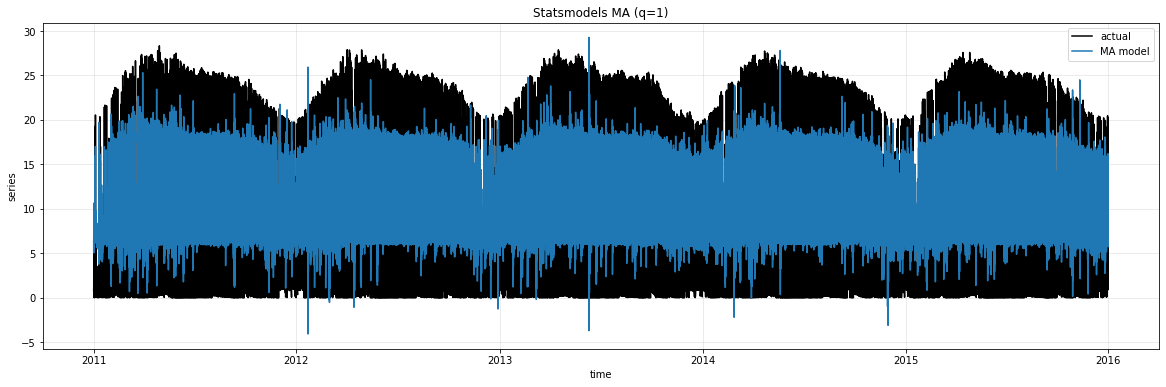

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [7]:
# plot different orders (q's)
for i in range(1,6):
    model = ARMA(data_train, (0,i)).fit()
    run_sequence_plot(data_train.index, data_train, title="Statsmodels MA (q={})".format(i))
    plt.plot(data_train.index, model.predict(start=1, end=23587), label="MA model")
    plt.legend()
    plt.show();

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


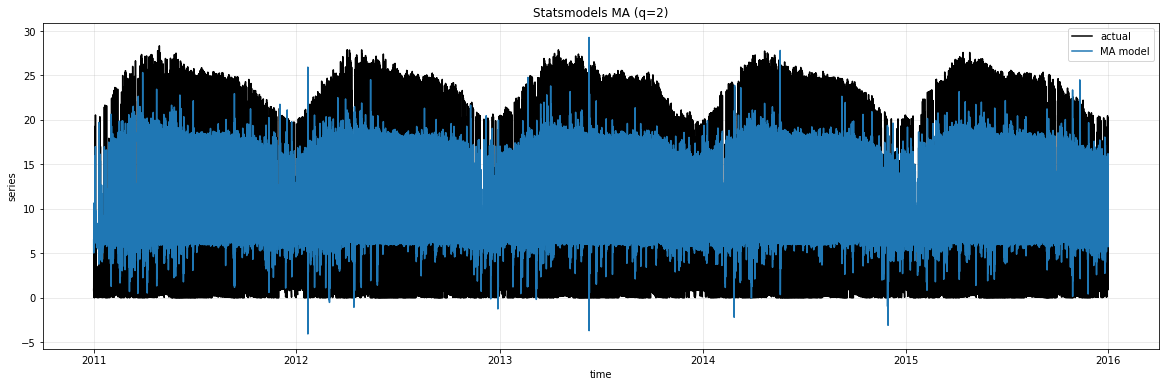

In [12]:
model = ARMA(data_train, (0,1)).fit()
run_sequence_plot(data_train.index, data_train, title="Statsmodels MA (q={})".format(i))
plt.plot(data_train.index, model.predict(start=1, end=23587), label="MA model")
plt.legend()
plt.show();

In [8]:
mse(data_train.values,model.predict(start=1, end=23587).values)

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


574134.088864481

### Choosing order of MA model
- how do you choose lags?

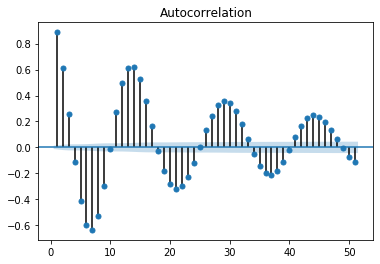

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(data_train, lags=range(1,52), alpha=0.05)

In [10]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(data_train)
print(pvalue)

8.781579003114527e-27


## Autoregressive Model
- regresses on past values, not errors
- plot different p's, keeping q 0

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


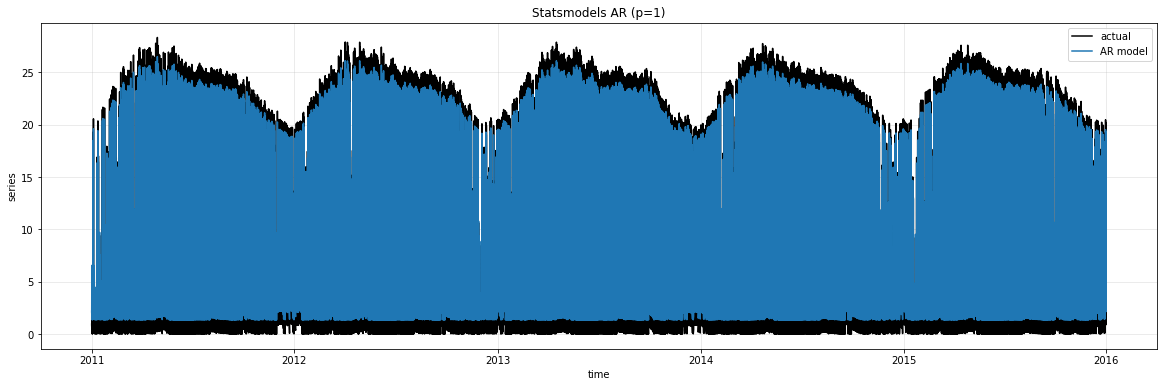

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


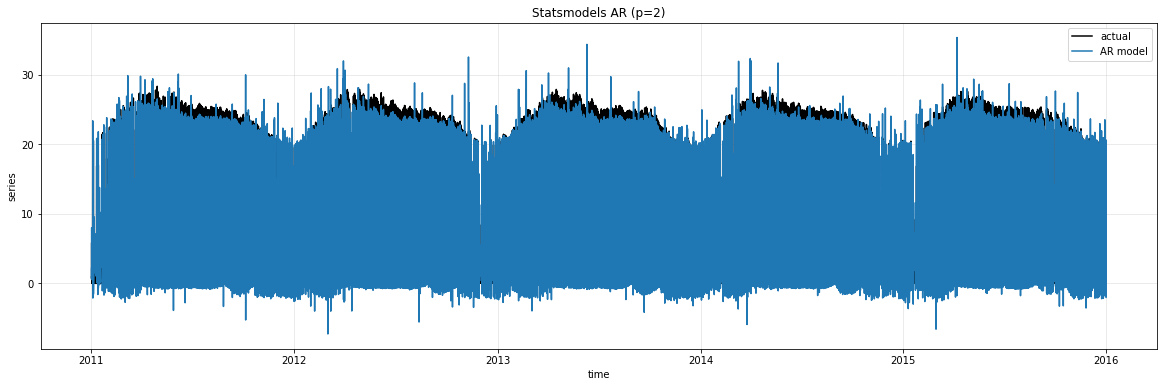

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


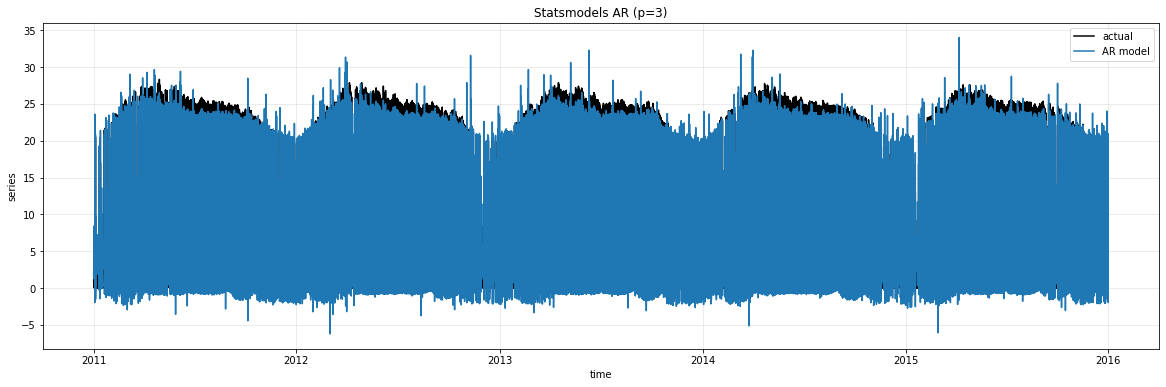

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


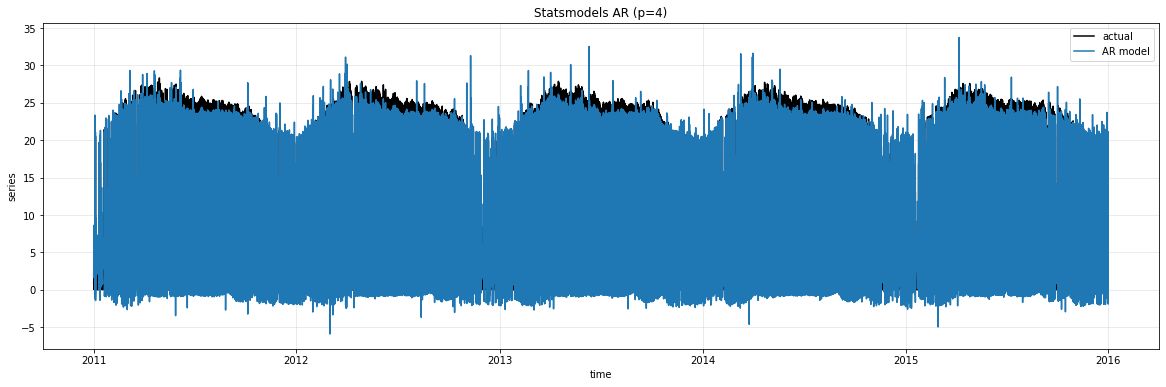

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


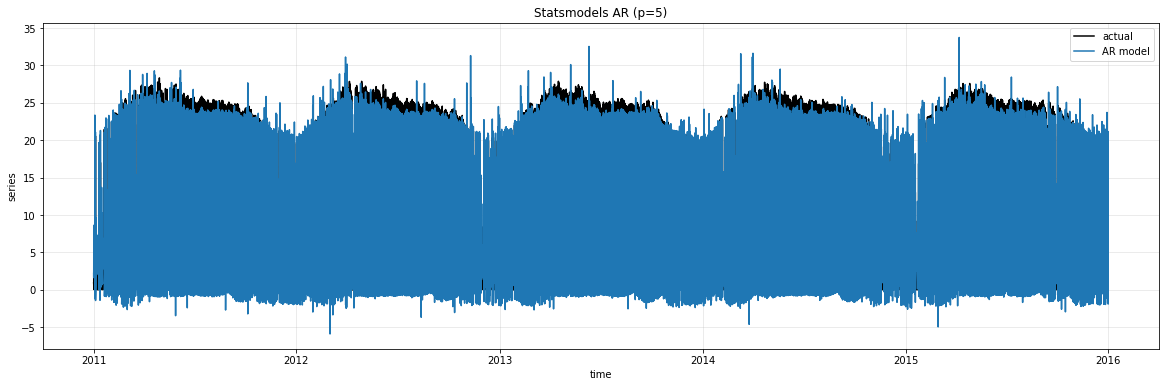

In [11]:
# plot different orders (q's)
for i in range(1,6):
    model = ARMA(data_train, (i,0)).fit()
    run_sequence_plot(data_train.index, data_train, title="Statsmodels AR (p={})".format(i))
    plt.plot(data_train.index, model.predict(start=1, end=23587), label="AR model")
    plt.legend()
    plt.show();

In [12]:
#MSE for last model
mse(data_train.values,model.predict(start=1, end=23587).values)

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


290403.3012456232

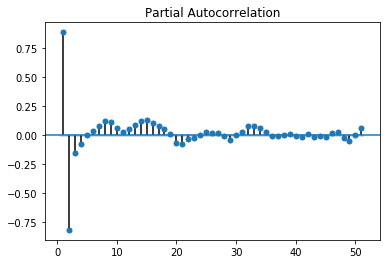

In [13]:
### Choosing p
from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(data_train, lags=range(1,52), alpha=0.05)

2 is probably best?

### Try ARMA model

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


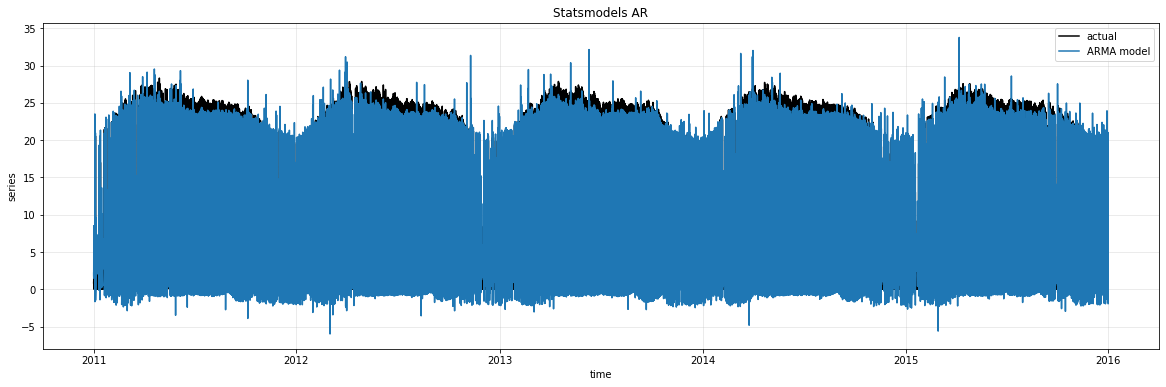

In [14]:
model_1 = ARMA(data_train, (2,1)).fit()
run_sequence_plot(data_train.index, data_train, title="Statsmodels AR")
plt.plot(data_train.index, model_1.predict(start=1, end=23587), label="ARMA model")
plt.legend()
plt.show();

In [15]:
mse(data_train.values,model_1.predict(start=1, end=23587).values)

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


290096.01414379507

### SARIMA

In [16]:
# define helper plot function for visualization
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    plt.figure(figsize=(20,6))
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
#     plt.tight_layout()

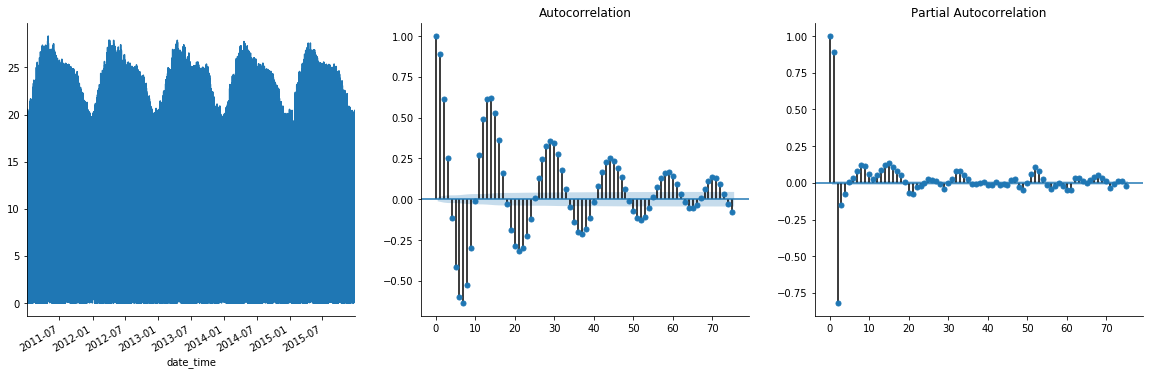

In [18]:
# helper plot for temps
plots(data_train, lags=75);

In [25]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(data_train, 
                                order=(3,1,0), 
                                seasonal_order=(1,1,1,12), 
                                trend='c').fit()
sar.summary()

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                kWh   No. Observations:                23587
Model:             SARIMAX(3, 1, 0)x(1, 1, 1, 12)   Log Likelihood              -56790.113
Date:                            Mon, 02 Dec 2019   AIC                         113594.226
Time:                                    16:13:49   BIC                         113650.701
Sample:                                         0   HQIC                        113612.557
                                          - 23587                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.951e-06   8.01e-05     -0.074      0.941      -0.000       0.000
ar.L1          0.7952      0.005    171.656      0.000       0.786       0.804
ar.L2         -0.0133      0.005     -2.813      0.005      -0.023      -0.004
ar.L3         -0.2473      0.005    -51.614      0.000      -0.257      -0.238
ar.S.L12       0.1390      0.005     26.673      0.000       0.129       0.149
ma.S.L12      -0.9962      0.001  -1528.911      0.000      -0.997      -0.995
sigma2         7.2188      0.047    152.949      0.000       7.126       7.311
===================================================================================
Ljung-Box (Q):                     6617.48   Jarque-Bera (JB):             26751.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

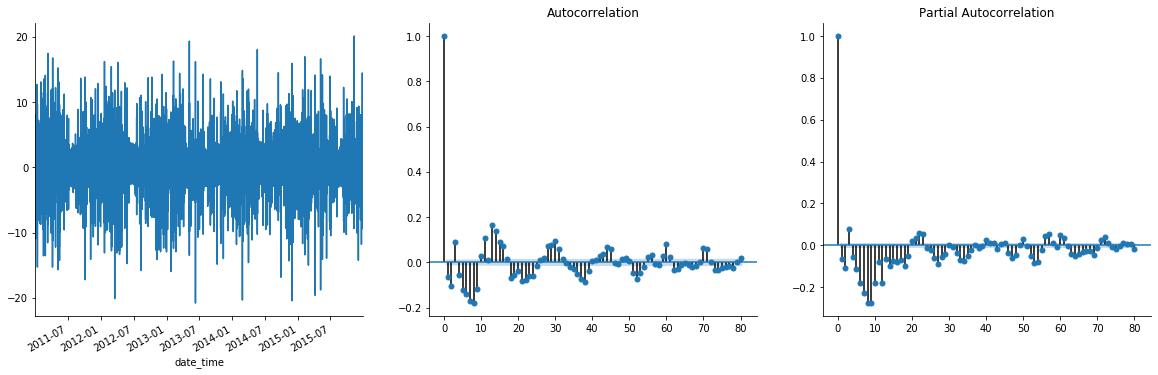

In [26]:
# plot resids
plots(sar.resid, lags=80);

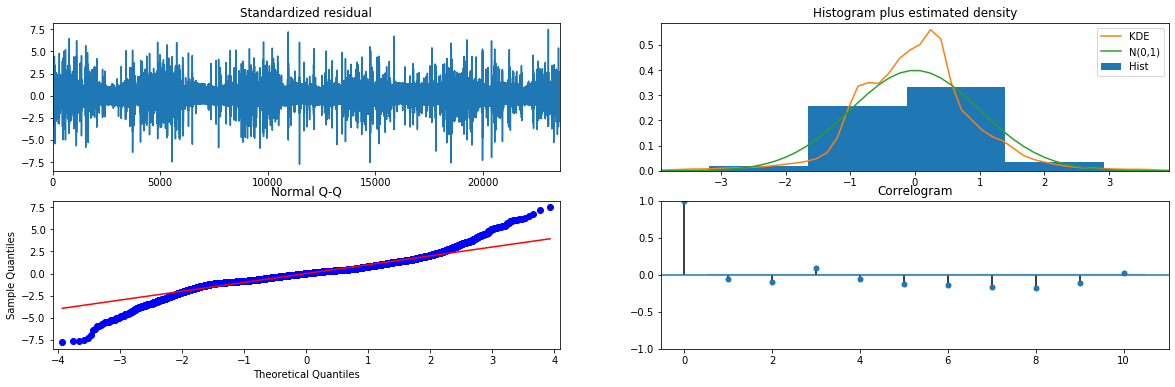

In [27]:
# plot residual diagnostics
sar.plot_diagnostics(figsize=(20,6));

In [45]:
y_pred = sar.predict(start=1,end=23587,dynamic=False)
y_pred2 = sar.predict(start=23588,end=28330,dynamic=True)

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


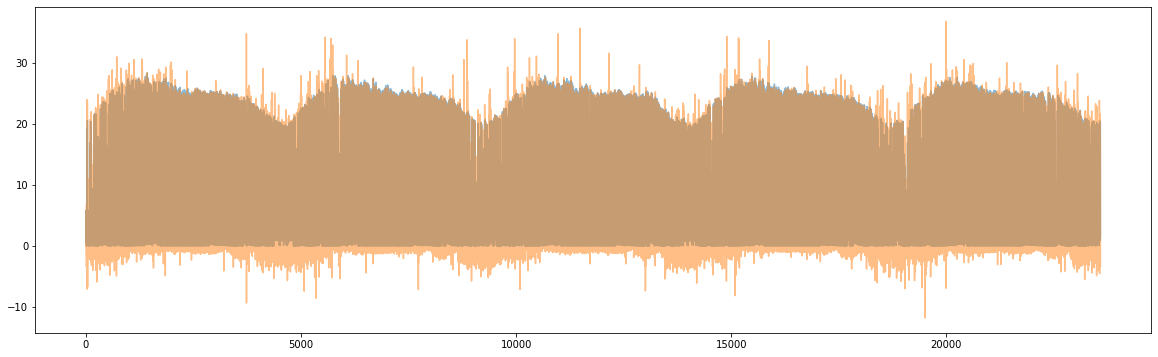

In [46]:
plt.figure(figsize=(20,6))
plt.plot(data_train.values,alpha=0.5)
plt.plot(y_pred.values,alpha=0.5);

In [30]:
mse(data_train.values,y_pred.values)

235270.12315825434

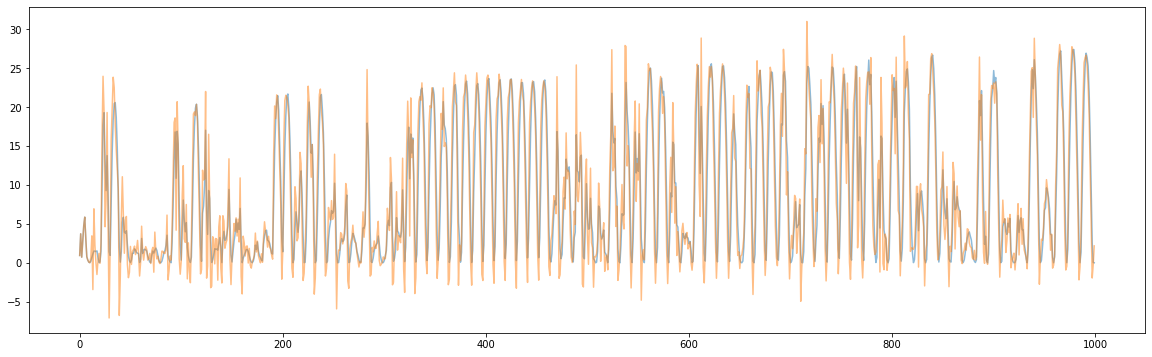

In [31]:
plt.figure(figsize=(20,6))
plt.plot(data_train.values[0:1000],alpha=0.5)
plt.plot(y_pred.values[0:1000],alpha=0.5);

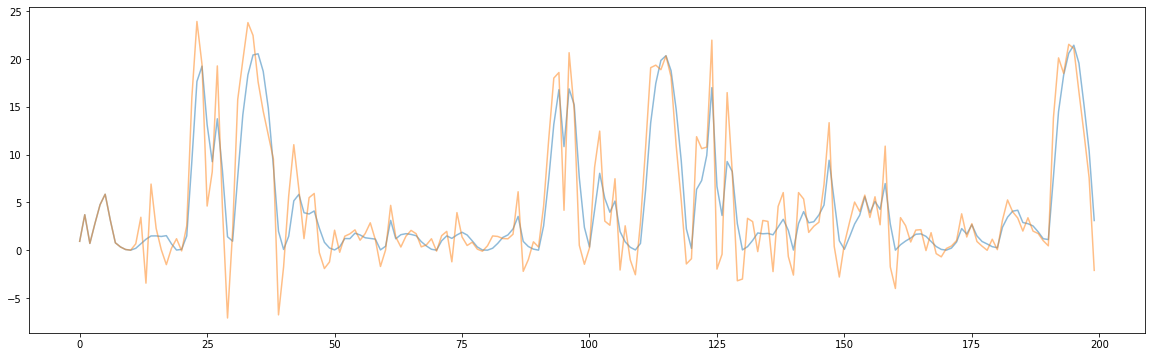

In [32]:
plt.figure(figsize=(20,6))
plt.plot(data_train.values[0:200],alpha=0.5)
plt.plot(y_pred.values[0:200],alpha=0.5);

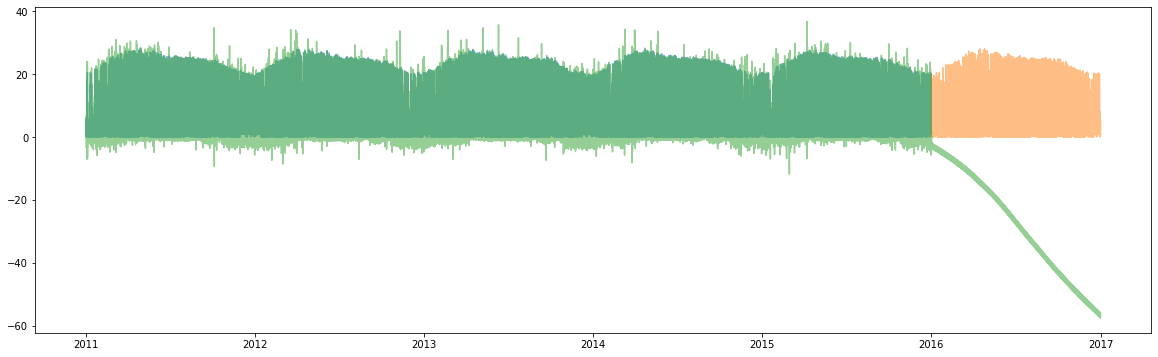

In [54]:
plt.figure(figsize=(20,6))
plt.plot(data_train,alpha=0.5)
plt.plot(data_test,alpha=0.5)
# plt.plot(data_train.index,y_pred,alpha=0.5)
plt.plot(data_train.index.append(data_test.index),y_pred.append(y_pred2),alpha=0.5);

#why can't I predict on data that wasn't used to train?